# sklearn_classification_models_for_seasonal_selections

https://www.projectpro.io/article/multi-class-classification-python-example/547#mcetoc_1fpjsn4g8g

https://www.educba.com/keras-sequential/

###### Load modules 

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier


import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:


# %matplotlib inline
# import sklearn
# import pandas as pd
# pd.set_option('display.float_format', '{:.2f}'.format)
# import numpy as np
# from random import sample
# from sklearn.ensemble import RandomForestRegressor as rfr
# from sklearn.ensemble import ExtraTreesRegressor as etr
# from sklearn.ensemble import GradientBoostingRegressor as gbr
# from sklearn.ensemble import AdaBoostRegressor as abr
# from sklearn.tree import DecisionTreeRegressor as dtr
# import matplotlib.pyplot as plt
# import csv
# from sklearn.model_selection import train_test_split

# # import plotting and stats modules

# import matplotlib.pyplot as plt
# import seaborn as sns
# import os
# import scipy
# import scipy.stats as sc
# import numpy as np
# from glob import glob

# # stats module
# import statsmodels.api as sm
# from statsmodels.tools.tools import add_constant
# from statsmodels.sandbox.regression.predstd import wls_prediction_std
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# from bokeh.io import output_notebook, output_file
# from bokeh.plotting import figure, show, save
# #%matplotlib inline

# # Bokeh Libraries
# # from bokeh.plotting import figure, show
# # from bokeh.io import output_file
# from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


# from sklearn.model_selection import cross_validate
# #sklearn.model_selection.cross_validate
# # from sklearn import cross_validation
# from sklearn.metrics import explained_variance_score
# from sklearn import metrics
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import GridSearchCV
# #from sklearn.cross_validation import KFold
# import pickle5 as Pickle

In [3]:
def metrics(x, y):
    
    from sklearn import metrics
    try:
        ev = metrics.explained_variance_score(x, y)
    except:
        ev = np.nan
    print("Ev score: ", ev)
    
    try:
        me = metrics.max_error(x, y)
    except:
        me = np.nan
    print("Maximum Error: ", me)
    
    try:
        mae = metrics.mean_absolute_error(x, y)
    except:
        mae = np.nan
    print("Mean Absolute Error: ", mae)
    
    try:
        mse = metrics.mean_squared_error(x, y)
    except:
        mse = np.nan
    print("Mean Squared Error: ", mse)
    
    try:
        rmse = metrics.mean_squared_error(x, y, squared=False)
    except:
        rmse =  np.nan
    print("Root Mean Squared Error: ", rmse)
    
    try:
        msle = metrics.mean_squared_log_error(x, y)
    except:
        msle = np.nan
    print("Mean Squared Log Error: ", msle)
   
    try:
        rmsle = metrics.mean_squared_log_error(x, y, squared = False)
    except:
        rmsle =  np.nan
    print("Root Mean Squared Log Error : ", rmsle)
    
    try:
        mape = metrics.mean_absolute_percentage_error(x, y)
    except:
        mape = np.nan
    print("Mean Absolute Percentage Error: ", mape)
    
    try:
        medae = metrics.median_absolute_error(x, y)
    except:
        medae = np.nan
    print("Median Absolute Error: ", medae)
    
    try:
        r2 = metrics.r2_score(x, y)
    except:
        r2 = np.nan
    print("Coefficient of determination: ", r2)
    
    try:
        bias = bias = np.mean(x) - np.mean(y)
    except:
        bias = np.nan
    print("Bias: ", bias)
    
    n = len(x)
    print("n: ", n)
    
    return ev, me, mae, mse, rmse, msle, rmsle, mape, medae, r2, bias, n


In [4]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
date_str = now.strftime("%Y%m%d")
date_time_str = now.strftime("%Y%m%d_%H%M%S")
print(date_str)
print(date_time_str)

20230215
20230215_094244


### Import data

In [5]:
#date_str = "20230201"
drive = "D"
data_date = "20230205"
# define output directory
output_dir = r"{0}:\cdu\data\zonal_stats\output\{1}".format(drive, date_str)
# export_dir = os.path.join(output_dir, date_time_str)

# data dir
dir_ = r"{0}:\cdu\data\zonal_stats\output\{1}\ml_data_si_dir".format(drive, data_date)

index_ = 1


In [6]:
def mk_dir_fn(dir_):
    """ Create a new directory if one does not already exist. """
    print("pathway ", dir_)
    if not os.path.isdir(dir_):
        os.mkdir(dir_)

        
def export_csv_fn(list_, dir_, file_name):
    
    """ Create and export path from directory and file name and exports csv with no dropping the index column. """
    
    df_final = pd.concat(list_, axis =0)    
    output_path = os.path.join(dir_, file_name)
    df_final.to_csv(os.path.join(output_path), index=False)
    print("File output to: ", output_path)
    
    return df_final

## Load data

In [7]:
file_list = []
for f in glob(os.path.join(dir_, "*class.csv")):
    print(f)
    file_list.append(f)


D:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\s_mean_max_min_med_std__fnm_fms_si_class.csv
D:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\r2_bs_mean_max_min_med_std__fnm_fms_si_class.csv
D:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\s_mean_max_min_med_std__fnm_fms_NOT_si_class.csv
D:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\r2_bs_mean_max_min_med_std__fnm_fms_NOT_si_class.csv
D:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\s_mean_max_min_med_std_met_fnm_fms_NOT_si_class.csv
D:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\r2_bs_mean_max_min_med_std_met_fnm_fms_NOT_si_class.csv
D:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\s_mean_max_min_med_std_met_fnm_fms_si_class.csv
D:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\r2_bs_mean_max_min_med_std_met_fnm_fms_si_class.csv


In [8]:
_, file_name = os.path.split(file_list[index_])
split_list = file_name.split(".")
data_set = split_list[0]

In [9]:
data_set

'r2_bs_mean_max_min_med_std__fnm_fms_si_class'

In [10]:
df = pd.read_csv(file_list[index_], header=0)

In [11]:
df

,target,site,uid,date,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,0,nt001,71,20110523,13.78,47.00,25.85,23.87,8.48,7.27,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,0,barkely01,24,20111025,0.75,2.87,1.69,1.49,0.70,4.38,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,0,barkely04,27,20111026,2.12,6.42,4.37,4.47,1.22,5.93,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
3,0,barkely03,26,20111026,0.75,3.29,1.82,1.64,0.70,3.66,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149
4,0,barkely02,25,20111026,2.12,13.78,4.97,4.73,2.43,3.13,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,8,ntadac0002,79,20160506,15.54,42.39,29.12,29.27,6.84,16.05,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,9,ntaarp0001,75,20160602,27.61,38.92,34.75,34.33,3.24,17.31,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
164,8,ntaarp0002,76,20160602,9.06,22.31,14.40,14.21,3.60,9.74,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733
165,7,ntaarp0003,77,20160603,5.26,25.45,13.08,12.11,5.79,9.61,...,-1885790,1885790,2958064,395123,1691000,2284112,1407000,2574722,4401001,6037665


## Set output file locations

In [12]:
ml_class_dir= os.path.join(output_dir, "ml_class_dir")
plots_dir = os.path.join(ml_class_dir, "ml_class_plots_dir")
all_plots_dir = os.path.join(plots_dir, "all")
no_tern_plots_dir = os.path.join(plots_dir, "no_tern")
mk_dir_fn(output_dir)
mk_dir_fn(ml_class_dir)
mk_dir_fn(plots_dir)
mk_dir_fn(all_plots_dir)
mk_dir_fn(no_tern_plots_dir)

pathway  D:\cdu\data\zonal_stats\output\20230215
pathway  D:\cdu\data\zonal_stats\output\20230215\ml_class_dir
pathway  D:\cdu\data\zonal_stats\output\20230215\ml_class_dir\ml_class_plots_dir
pathway  D:\cdu\data\zonal_stats\output\20230215\ml_class_dir\ml_class_plots_dir\all
pathway  D:\cdu\data\zonal_stats\output\20230215\ml_class_dir\ml_class_plots_dir\no_tern


In [13]:
# export_dir = os.path.join(output_dir, date_time_str)
# ml_class_dir= os.path.join(output_dir, "ml_class_dir")
# data_set_dir= os.path.join(ml_rf_reg_dir, "data_set")
# export_ml_rf_reg_dir = os.path.join(data_set_dir, date_time_str)
# # plots_dir = os.path.join(export_ml_rf_reg_dir, data_set)
# all_plots_dir = os.path.join(export_ml_rf_reg_dir, "all_plots")
# # no_tern_plots_dir = os.path.join(plots_dir, "no_tern")


In [14]:
# mk_dir_fn(output_dir)
# mk_dir_fn(ml_class_dir)
# mk_dir_fn(data_set_dir)
# mk_dir_fn(export_ml_rf_reg_dir)
# # mk_dir_fn(plots_dir)
# mk_dir_fn(all_plots_dir)
# # mk_dir_fn(no_tern_plots_dir)

<AxesSubplot:xlabel='target', ylabel='Count'>

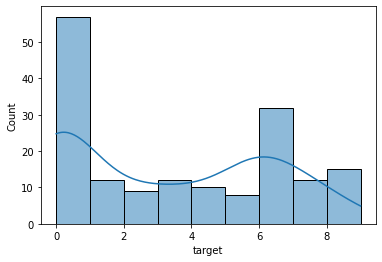

In [15]:
sns.histplot(x= 'target', data=df, kde=True)

In [16]:
df_ml = df.copy(deep=True)

### Set variables to plot

## Choose which data set to run the models from

In [17]:
df_ml.head(5)

,target,site,uid,date,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,0,nt001,71,20110523,13.78,47.00,25.85,23.87,8.48,7.27,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,0,barkely01,24,20111025,0.75,2.87,1.69,1.49,0.70,4.38,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,0,barkely04,27,20111026,2.12,6.42,4.37,4.47,1.22,5.93,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
3,0,barkely03,26,20111026,0.75,3.29,1.82,1.64,0.70,3.66,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149
4,0,barkely02,25,20111026,2.12,13.78,4.97,4.73,2.43,3.13,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007


In [18]:
# drop some of the unwanted values
df_ml.drop(['site', 'uid', 'date'], axis=1, inplace=True) # 'date',
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

In [19]:
df_ml

,target,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,b1_h99a_01122_max,b1_h99a_01122_mean,b1_h99a_01122_med,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,0,13.78,47.00,25.85,23.87,8.48,7.27,11.78,9.24,8.86,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,0,0.75,2.87,1.69,1.49,0.70,4.38,8.97,6.83,7.18,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,0,2.12,6.42,4.37,4.47,1.22,5.93,8.85,7.68,7.68,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
3,0,0.75,3.29,1.82,1.64,0.70,3.66,7.09,4.98,4.85,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149
4,0,2.12,13.78,4.97,4.73,2.43,3.13,5.82,4.55,4.43,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,8,15.54,42.39,29.12,29.27,6.84,16.05,20.42,18.75,18.77,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,9,27.61,38.92,34.75,34.33,3.24,17.31,21.59,19.37,19.22,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
164,8,9.06,22.31,14.40,14.21,3.60,9.74,16.81,13.63,13.79,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733
165,7,5.26,25.45,13.08,12.11,5.79,9.61,20.05,13.89,13.26,...,-1885790,1885790,2958064,395123,1691000,2284112,1407000,2574722,4401001,6037665


## Qty of 0 values dataset 

In [20]:
model_data_ = df_ml
model_data_name = "all_values"


model_data_ = df_ml[df_ml['target']>0.0]
model_data_name = "no0_values"


# ## Select a randon number of 0 values
# n = 3
# agb_0 = df_ml[df_ml['target']==0.0].sample(n)
# model_data = pd.concat([df_ml[df_ml['target']>0.0], agb_0])
# model_data_name = f"s{n}_0_values"


model_outputs = os.path.join(ml_class_dir, f"{model_data_name}")
mk_dir_fn(model_outputs)

print(model_outputs)
print(model_data_.shape)

# define model output name for all outputs
#str_model = f"{mdl}_{model_data_name}_n_est_{n_est}_m_feat_{m_feat}_m_depth_{maxd}_{date_time_str}"

pathway  D:\cdu\data\zonal_stats\output\20230215\ml_class_dir\no0_values
D:\cdu\data\zonal_stats\output\20230215\ml_class_dir\no0_values
(110, 171)


In [21]:
# model_data = df_ml
# model_data_name = "all_values"

# # ## Filter out all taregt == 0 values
# model_data = df_ml[df_ml['target']>0]
# model_data_name = "no0_values"

# # ## Filter out all taregt == 0 values
# model_data = df_ml[(df_ml['target']>0) & (df_ml['target']!=9)]
# model_data_name = "no0or9_values"


# # ## Select a randon number of 0 values
# # n = 3
# # agb_0 = df_ml[df_ml['target']==0.0].sample(n)
# # model_data = pd.concat([df_ml[df_ml['target']>0.0], agb_0])
# # model_data_name = f"s{n}_0_values"


# model_outputs = os.path.join(export_ml_class_dir, f"{model_data_name}")
# mk_dir_fn(model_outputs)

# print(model_outputs)

# define model output name for all outputs
#str_model = f"{mdl}_{model_data_name}_n_est_{n_est}_m_feat_{m_feat}_m_depth_{maxd}_{date_time_str}"

In [22]:
model_data_.target.value_counts()

6    32
8    13
7    12
3    12
1    12
4    10
2     9
5     8
9     2
Name: target, dtype: int64

In [23]:
model_data_.dropna(inplace=True)

C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
model_data_

,target,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,b1_h99a_01122_max,b1_h99a_01122_mean,b1_h99a_01122_med,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
5,2,1.79,5.83,2.86,2.48,1.22,3.80,5.20,4.29,4.27,...,-1452928,1452928,400174,-1264158,1238000,1250407,846000,1420098,2149390,2440148
8,2,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2148760,2148760,-267789,-1724138,1148000,1156438,732000,1358238,2373541,2737539
9,2,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2327297,2327297,176162,-1318945,1571000,1235708,877000,1377054,1926203,2153802
10,5,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2063673,2063673,799162,-701031,1106000,1197360,743000,1417038,2593368,3039489
12,2,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-1639267,1639267,1618314,-88940,1673000,2020530,1324000,2256305,3482378,4382641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,8,15.54,42.39,29.12,29.27,6.84,16.05,20.42,18.75,18.77,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,9,27.61,38.92,34.75,34.33,3.24,17.31,21.59,19.37,19.22,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
164,8,9.06,22.31,14.40,14.21,3.60,9.74,16.81,13.63,13.79,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733
165,7,5.26,25.45,13.08,12.11,5.79,9.61,20.05,13.89,13.26,...,-1885790,1885790,2958064,395123,1691000,2284112,1407000,2574722,4401001,6037665


## Split off unseen data - currently not enough points per class

In [26]:
# delete class 9 too few data points
model_data = model_data_[model_data_["target"]<9.0]

In [27]:
# model_data__.target.value_counts()

In [28]:
# # Creating a dataframe with 20%
# # values of original dataframe
# unseen_data = model_data__.sample(frac = 0.2)
 
# # Creating dataframe with
# # rest of the 80% values
# model_data = model_data__.drop(unseen_data.index)


In [29]:
# model_data = model_data_
model_data.target.value_counts()

6    32
8    13
7    12
3    12
1    12
4    10
2     9
5     8
Name: target, dtype: int64

In [30]:
# unseen_data.target.value_counts()

 Define if you are using all variabes or selected variables

In [31]:
# # from sklean.model
# # randomly split data into train and test datasets, the user needs to define the variables 
# xdata1 = model_data.iloc[:, 1:].astype('float32')
# ydata1 = model_data[["target"]].astype('int')
# ydata2 = ydata1.values
# ydata = ydata2.ravel()

# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, train_size=0.70, stratify=ydata)  
         
# #y_test.value_counts()
# # # print(X_test.shape, y_test.shape)

In [34]:
# Stratify the data split into train and test datasets.
# The stratify parameter will ensure that the train and test split has the same class 
# distribution ratio as the original dataset.

xdata = model_data.iloc[:, 1:].astype('float32')
ydata = model_data[["target"]].astype('int')

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, train_size=0.70, stratify=ydata)  

The stratify parameter will ensure that the train and test split has the same class distribution ratio as the original dataset. It is crucial in the case of imbalanced datasets. Otherwise, it might happen that the training data only consists of the majority class

In [ ]:
# scaler = StandardScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train))
# X_text = pd.DataFrame(scaler.transform(X_test))

In [35]:
y_train.value_counts()

target
6         22
8          9
1          9
7          8
3          8
4          7
5          6
2          6
dtype: int64

Now comes the turn to handle the class imbalance. Oversampling is one of the most widely used techniques to deal with imbalance classes. To briefly explain the concept, we generate synthetic samples for minority classes to make sure we have enough data to train the model. I will be using SMOTE for oversampling. You can install imblearn module for using SMOTE

In [36]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
# x_TRAIN_RES, Y_TRAIN_RES = SM.FIT_RESAMPLE(x_TRAIN, Y_TRAIN)

In [37]:
y_train_res.target.ravel()

array([6, 6, 4, 4, 2, 6, 6, 1, 7, 5, 3, 7, 7, 3, 7, 6, 3, 8, 1, 6, 8, 6,
       1, 3, 4, 1, 8, 5, 7, 2, 1, 4, 7, 6, 6, 2, 8, 8, 7, 4, 6, 6, 2, 6,
       1, 6, 6, 6, 5, 5, 3, 1, 1, 3, 8, 8, 3, 8, 8, 6, 3, 7, 2, 1, 6, 5,
       6, 4, 6, 6, 4, 6, 6, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [115]:
def class_metrics(x, y):
    from sklearn import metrics
    try:
        a_score = metrics.accuracy_score(x, y, normalize = False)
    except:
        a_score = np.nan
    print("accuracy score: ", a_score)   
    
    try:
        na_score = metrics.accuracy_score(x, y, normalize = True)
    except:
        na_score = np.nan
    print("Normalised accuracy score: ", na_score) 
    
    try:
        bas = metrics.balanced_accuracy_score(x, y)
    except:
        bas = np.nan
    print("Balanced Accuracy Score: ", bas)
    
    try:
        tkas = metrics.top_k_accuracy_score(x,y)
    except:
        tkas = np.nan
    print("Top-k Accuracy Classification Score: ", tkas)
    
    try:
        micro_ps = metrics.precision_score(x, y, average = "micro")
    except:
        micro_ps = np.nan
    print("Precision Score (Micro): ", aps)
    
    
    try:
        micro_rs = metrics.recall_score(x, y, average='micro')
    except:
        micro_rs = np.nan
    print("Recall Score (Micro): ", micro_rs)

    
#     try:
#         weighted_rs = metrics.recall_score(x, y, average='weighted')
#     except:
#         weighted_rs = np.nan
#     print("Recall Score (Weighted): ", weighted_rs)
    
    
#     weighted
        
    
    return a_score, na_score, bas, tkas, micro_ps, micro_rs#, weighted_rs

 - **Accuracy Classification Score:** In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true. Returns exact number of accurate matches.

 - **Normalised Accuracy Classification Score:** In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true. Returns the proportion of accurate matches.
 

- **Balanced Accuracy Score:** The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class. The best value is 1 and the worst value is 0 when adjusted=False


 - **Top-k Accuracy Classification Score:** The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class. The best value is 1 and the worst value is 0 when adjusted=False
 
  - **Recall Score:** The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
  

### SVC

In [116]:
model_svc = svm.SVC()

C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.33      0.67      0.44         3
           3       0.33      0.50      0.40         4
           4       0.00      0.00      0.00         3
           5       0.17      0.50      0.25         2
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         4
           8       0.25      0.50      0.33         4

    accuracy                           0.30        33
   macro avg       0.20      0.40      0.26        33
weighted avg       0.16      0.30      0.21        33

Confusion matrix, without normalization
[[3 0 0 0 0 0 0 0]
 [1 2 0 0 0 0 0 0]
 [1 0 2 0 0 0 0 1]
 [0 1 1 0 1 0 0 0]
 [0 1 0 0 1 0 0 0]
 [1 1 2 1 2 0 0 3]
 [0 0 1 0 1 0 0 2]
 [0 1 0 0 1 0 0 2]]
accuracy score:  10
Normalised accuracy score:  0.30303030303030304
Balanced Accuracy Score:  0.3958333333333333
Top-k Accuracy Classification Score:  nan
P

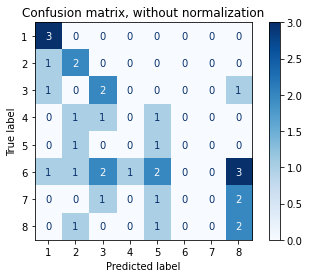

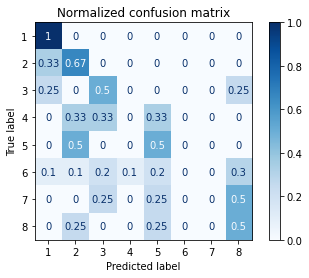

In [117]:
model_svc = svm.SVC()
model_svc .fit(X_train_res, y_train_res.target.ravel())
y_pred = model_svc.predict(X_test)
print(classification_report(y_test, y_pred))

np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model_svc,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
    a_score, na_score, bas, tkas, micro_ps, micro_rs = class_metrics(y_test, y_pred)


plt.show()
# from sklearn import metrics
# aps = metrics.precision_score(y_test, y_pred, average = "micro")


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

### Decision Tree Classifier

C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           2       0.33      0.33      0.33         3
           3       0.25      0.50      0.33         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.25      0.10      0.14        10
           7       0.50      0.25      0.33         4
           8       0.33      0.75      0.46         4

    accuracy                           0.30        33
   macro avg       0.29      0.33      0.28        33
weighted avg       0.30      0.30      0.27        33

Confusion matrix, without normalization
[[2 0 0 0 1 0 0 0]
 [0 1 2 0 0 0 0 0]
 [1 0 2 0 0 1 0 0]
 [0 1 1 0 0 1 0 0]
 [0 1 1 0 0 0 0 0]
 [0 0 1 0 1 1 1 6]
 [0 0 1 0 2 0 1 0]
 [0 0 0 0 0 1 0 3]]
Normalized confusion matrix
[[0.6667 0.     0.     0.     0.3333 0.     0.     0.    ]
 [0.     0.3333 0.6667 0.     0.     0.     0.     0.    ]
 [0.25   0

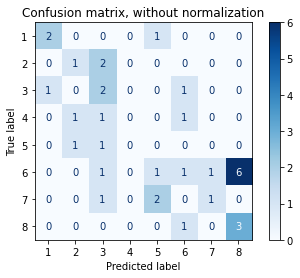

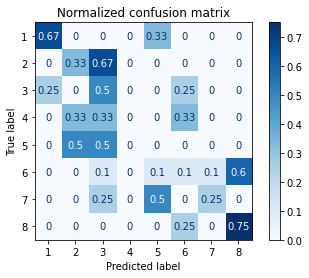

In [41]:
model = DecisionTreeClassifier(class_weight='balanced', max_depth=10)
model .fit(X_train_res, y_train_res.target.ravel())
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Random Forest Classifier

C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           1       0.38      1.00      0.55         3
           2       0.00      0.00      0.00         3
           3       1.00      0.25      0.40         4
           4       0.00      0.00      0.00         3
           5       0.17      0.50      0.25         2
           6       0.20      0.10      0.13        10
           7       0.00      0.00      0.00         4
           8       0.22      0.50      0.31         4

    accuracy                           0.24        33
   macro avg       0.25      0.29      0.20        33
weighted avg       0.25      0.24      0.19        33

Confusion matrix, without normalization
[[3 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 1]
 [1 0 0 0 1 1 0 0]
 [0 1 0 0 1 0 0 0]
 [0 0 0 0 3 1 0 6]
 [0 0 0 0 1 3 0 0]
 [0 0 0 0 0 0 2 2]]
Normalized confusion matrix
[[1.     0.     0.     0.     0.     0.     0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.25   0

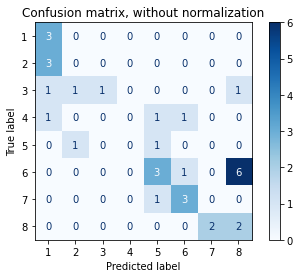

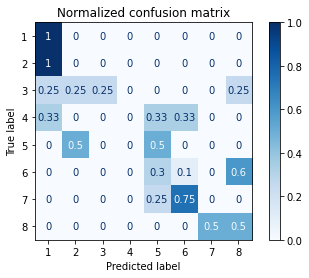

In [42]:
model = RandomForestClassifier(class_weight='balanced', random_state=1,max_depth=5, \
                              n_estimators =10, max_features=1)
model .fit(X_train_res, y_train_res.target.ravel())
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## KNN

C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           1       0.50      0.67      0.57         3
           2       0.40      0.67      0.50         3
           3       0.25      0.25      0.25         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         4
           8       0.33      0.75      0.46         4

    accuracy                           0.24        33
   macro avg       0.19      0.29      0.22        33
weighted avg       0.15      0.24      0.18        33

Confusion matrix, without normalization
[[2 0 0 0 1 0 0 0]
 [0 2 0 0 1 0 0 0]
 [1 0 1 1 0 0 0 1]
 [1 0 0 0 1 1 0 0]
 [0 1 1 0 0 0 0 0]
 [0 2 2 1 2 0 0 3]
 [0 0 0 0 1 1 0 2]
 [0 0 0 0 1 0 0 3]]
Normalized confusion matrix
[[0.6667 0.     0.     0.     0.3333 0.     0.     0.    ]
 [0.     0.6667 0.     0.     0.3333 0.     0.     0.    ]
 [0.25   0

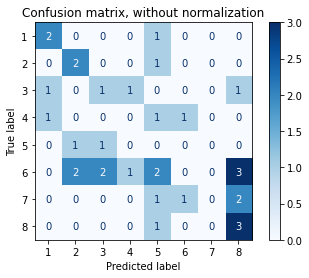

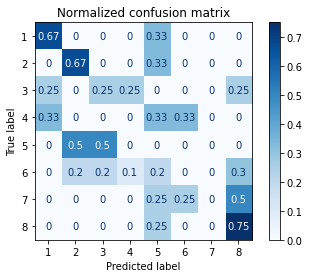

In [43]:
model = KNeighborsClassifier(3)
model .fit(X_train_res, y_train_res.target.ravel())
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## AdaBoost Classifier

C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.11      0.25      0.15         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        10
           7       0.50      0.75      0.60         4
           8       0.44      1.00      0.62         4

    accuracy                           0.24        33
   macro avg       0.13      0.25      0.17        33
weighted avg       0.13      0.24      0.17        33

Confusion matrix, without normalization
[[0 2 1 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 1 1 1 0 0 1 0]
 [0 0 2 0 1 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 0 1 1 1 0 2 5]
 [0 0 0 0 1 0 3 0]
 [0 0 0 0 0 0 0 4]]
Normalized confusion matrix
[[0.     0.6667 0.3333 0.     0.     0.     0.     0.    ]
 [0.     0.     1.     0.     0.     0.     0.     0.    ]
 [0.     0

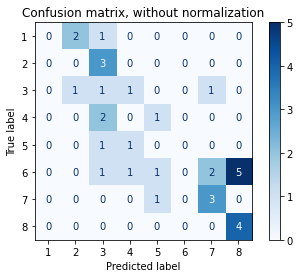

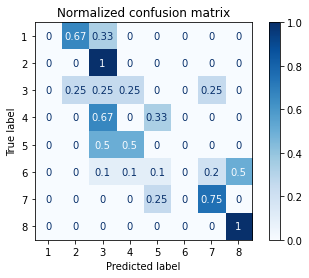

In [44]:
model = AdaBoostClassifier(learning_rate=0.01)
model .fit(X_train_res, y_train_res.target.ravel())
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Neural Networks

In [45]:
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=26, activation='relu'),
    keras.layers.Dense(16, activation = "relu"),
    keras.layers.Dropout(0,3),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(4, activation = "softmax")
])

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
y_train_enc = pd.get_dummies(y_train_res)
y_train_enc

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(y_train_res[['target']]).toarray())
# merge with main df bridge_df on key values
y_train_res = y_train_res.join(enc_df)
y_train_res

In [ ]:
enc_df = pd.DataFrame(enc.fit_transform(y_test_res[['target']]).toarray())
# merge with main df bridge_df on key values
y_test_res = y_test_res.join(enc_df)
y_test_res

In [ ]:
y_train_res.drop("target", axis=1, inplace=True)

In [ ]:
y_train_res

In [ ]:
history = model.fit(X_train_res, y_train_enc, epochs=500, validation_split=0.2)

https://www.educba.com/keras-sequential/

In [ ]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(3,))
x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
outputs = tf.keras.layers.Dense(5, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

# This is identical to the following:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(8))

# Note that you can also omit the `input_shape` argument.
# In that case the model doesn't have any weights until the first call
# to a training/evaluation method (since it isn't yet built):
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4))
# model.weights not created yet

# Whereas if you specify the input shape, the model gets built
# continuously as you are adding layers:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
model.add(tf.keras.layers.Dense(4))
len(model.weights)
# Returns "4"

# When using the delayed-build pattern (no input shape specified), you can
# choose to manually build your model by calling
# `build(batch_input_shape)`:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4))
model.build((None, 16))
len(model.weights)
# Returns "4"

# Note that when using the delayed-build pattern (no input shape specified),
# the model gets built the first time you call `fit`, `eval`, or `predict`,
# or the first time you call the model on some input data.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='sgd', loss='mse')
# This builds the model for the first time:
model.fit(x, y, batch_size=32, epochs=10)

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((X_train_res, y_train_enc))
valid_data = tf.data.Dataset.from_tensor_slices((X_test_res, y_test_enc))

history = model.fit(X_train_res, y_train_enc, epochs=500, validation_split=0.2)

In [ ]:
model.fit(trainMixed, trainVocals,epochs=10, validation_data=(testMixed, testVocals))

In [ ]:
import tensorflow as tf

train_data = tf.data.Dataset.from_tensor_slices((trainMixed, trainVocals))
valid_data = tf.data.Dataset.from_tensor_slices((testMixed, testVocals))

model.fit(train_data, epochs=10, validation_data=valid_data)

In [ ]:

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model_svc,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
y_test.value_counts()

In [ ]:
y_pred

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
ydata

In [ ]:
# class_names = iris.target_names

# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# class_names = iris.target_names

# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
n_est = 300
rs = 1
maxd = 4

rng = np.random.RandomState(rs)
rfrModel_1 = abr(dtr(max_depth=maxd), n_estimators=n_est, random_state=rng)
print(rfrModel_1)
mdl = "abr"
str_model = f"rf_{abr}_{model_data_name}_n_est_{n_est}_rs_{rs}_maxd_{maxd}_{date_time_str}"
print(str_model)

In [ ]:
n_est = 100
lr=0.1
rs = 1
maxd = 4
loss = 'squared_error'

rfrModel_1 = gbr(n_estimators=n_est, learning_rate=lr, max_depth=maxd, random_state=1, loss=loss)
print(rfrModel_1)
mdl = "gbr"
str_model = f"rf_{mdl}_{model_data_name}_n_est_{n_est}_lr{lr}_{loss}_rs_{rs}_maxd_{maxd}_{date_time_str}"
print(str_model)

In [ ]:
# rfrModel_1 = etr(n_estimators=100, bootstrap=True, oob_score=True,  max_features='log2', min_samples_split=1,n_jobs=-1) 
# rfrModel_1

In [ ]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [ ]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True) #,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [ ]:
np.nan_to_num(X_1)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [ ]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

In [ ]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult
r2 = round(rfrLCHM.score(X_1, y_1), 2)
mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
# print(r2)
# print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
# print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
# print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed target')

plt.xlabel('Predicted target')

# 1 for 1 line
#adding text inside the plot
plt.text(100, 33000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(100, 30000, f'$MSE = {mse}$', fontsize = 12)
plt.text(100, 27000, f'$n = {len(y_1)}$', fontsize = 12)


plt.plot(x, y, color = 'r')

plot_out = os.path.join(model_outputs, f'{str_model}_plot.jpg')
plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
print(f"plot saved to: {plot_out}")


In [ ]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

plt.show()
plot_out = os.path.join(model_outputs, f'{str_model}_feature_importance_plot.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

In [ ]:
dfsort['n'].astype('float')
dfsort.info()
dfsort['n'] = dfsort['n'].astype('float')
dfsort.info()

In [ ]:
num_bf_selection = 0.01
df_var = dfsort[dfsort['n'] > num_bf_selection]

In [ ]:
column_var = df_var.band.tolist()

In [ ]:
column_var.insert(0, 'target')

In [ ]:
select_model_data = df_ml[column_var]

In [ ]:
df_corr = select_model_data.corr()
df_corr.to_csv(os.path.join(model_outputs, f'{str_model}_feature_imp_n_{num_bf_selection}_.csv'), index=False)
df_corr

In [ ]:
variable_imp_list = dfsort.band.to_list()

In [ ]:
variable_imp_list

### Run same model and same peramiters with selected features

In [ ]:
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = select_model_data.iloc[:, 1:].astype('float32')
ydata1 = select_model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

In [ ]:
if mdl == "abr":
    
    rng = np.random.RandomState(rs)
    rfrModel_1 = abr(dtr(max_depth=maxd), n_estimators=n_est, random_state=rng)
    str_model = f"rf_abr_{model_data_name}_slc_feat_n_est_{n_est}_rs_{rs}_maxd_{maxd}_{date_time_str}"
    print(str_model)


elif mdl== gbr:
    rfrModel_1 = gbr(n_estimators=n_est, learning_rate=lr, max_depth=maxd, random_state=1, loss=loss)
    str_model = f"rf_gbr_{model_data_name}_slc_feat_n_est_{n_est}_lr{lr}_{loss}_rs_{rs}_maxd_{maxd}_{date_time_str}"
    print(str_model)
else:
    pass
        

In [ ]:
np.nan_to_num(X_1)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [ ]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

In [ ]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult
r2 = round(rfrLCHM.score(X_1, y_1), 2)
mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
# print(r2)
# print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
# print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
# print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed target')

plt.xlabel('Predicted target')

# 1 for 1 line
#adding text inside the plot
plt.text(100, 33000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(100, 30000, f'$MSE = {mse}$', fontsize = 12)
plt.text(100, 27000, f'$n = {len(y_1)}$', fontsize = 12)


plt.plot(x, y, color = 'r')

plot_out = os.path.join(model_outputs, f'{str_model}_select_feat_plot.jpg')
plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
print(f"plot saved to: {plot_out}")


In [ ]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

plt.show()
plot_out = os.path.join(model_outputs, f'{str_model}_select_features_feature_importance_plot.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

### Predict the selected model on the test data

In [ ]:
# plt.scatter(y2_predict, y_2)
# plt.show()

In [ ]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))


r2 = round(rfrLCHM.score(X_1, y_1), 2)
mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
rmse = round(np.sqrt(np.mean((y2_predict - y_2) ** 2)), 2)
bias = round(np.mean(y_2) - np.mean(y2_predict), 2)

plt.scatter(y2_predict, y_2 ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1,40000)
plt.ylim(-1, 40000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line

#adding text inside the plot
plt.text(300, 37000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {mse}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {mse}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {bias}$', fontsize = 12)
plt.text(300, 29000, f'$n = {len(y_1)}$', fontsize = 12)

plt.plot(x, y, color = 'r')
plot_out = os.path.join(model_outputs, f'{str_model}_test_data.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()

In [ ]:
str_model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = y2_predict
y = y_2

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

print(x)
print(y)
print(z)
# fig, ax = plt.subplots()
# ax.scatter(x, y, c=z, s=0.8, edgecolor='')

# # data for the 1 for 1 line
# a = [-1,25]
# b = [-1,25]

# #sets the limits of the axis
# plt.xlim(-1,25)
# plt.ylim(-1,25)
# plt.ylabel('Observed mean CHM')
# plt.xlabel('Predicted mean CHM')
# # 1 for 1 line
# ax.plot(a, b, color = 'black')

# plt.show()

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [ ]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

pkl_out = os.path.join(model_outputs, f'rf_model_{str_model}')


with open(pkl_out, 'wb') as f:
    pickle.dump(rfrLCHM, f)

## Load in unseen data here

In [ ]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model
new_data = select_model_data
# df = pd.read_csv(csv_file, header=0)
# df.shape 

In [ ]:
c_list = new_data.columns.tolist()
c_list

In [ ]:
#df1 = df[(df['comp'] == 'l57')]
df1 = new_data[(new_data['target'] > 0.01)]
df1.dropna(inplace=True)
print (df1.shape)

In [ ]:
df1.columns

In [ ]:
column_var

In [ ]:
df1[column_var].info()

In [ ]:
df1

In [ ]:
xdata2 = df1[column_var].astype('float32')
xdata2.drop("target", axis=1, inplace=True)

ydata1 = df1[['target']].astype('float32')

ydata2 = ydata1.values

ydata = ydata2.ravel()

print(len(ydata1))

In [ ]:
xdata2

In [ ]:
with open(pkl_out, 'rb') as f:
        rf = pickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print('Predicted data r2 =', rf.score(xdata2, ydata))
print('MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f'))
print('explained_var =',format(explained_variance_score(ydata, predicted),  '.3f'))
print('bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f'))
print('n =' , len(ydata))

r2 = round(rf.score(xdata2, ydata), 2)
mse = round(np.mean((ydata - rf.predict(xdata2))** 2), 2)
rmse = round(np.sqrt(np.mean((predicted - ydata) ** 2)), 2)
exp_var = round(explained_variance_score(ydata, predicted), 2)
bias = round(np.mean(ydata) - np.mean(predicted), 2)

# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=8, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1, 40000)
plt.ylim(-1, 40000)

#adding text inside the plot
plt.text(300, 37000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {mse}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {mse}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {bias}$', fontsize = 12)
plt.text(300, 29000, f'$Var = {exp_var}$', fontsize = 12)
plt.text(300, 27000, f'$n = {len(y_1)}$', fontsize = 12)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')

plot_out = os.path.join(model_outputs, f'{str_model}_unseen_data.jpg')

fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()